In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import pandasql
from pandasql import sqldf
import sqlite3
%matplotlib inline

In [2]:
#load the datset
df1=pd.read_csv("u.data.csv")
df2=pd.read_csv("u.item.csv")
df3=pd.read_csv("u.user.csv")

In [3]:
df1.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
df2.head()

,movie_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df3.head()

,user_id,age,occupation,zip code,Gender
0,1,24,technician,85711,M
1,2,53,other,94043,F
2,3,23,writer,32067,M
3,4,24,technician,43537,M
4,5,33,other,15213,F


In [6]:
#desicribe the data
df3.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [7]:
#check the null for df3 value if any
df3.isnull().head()

,user_id,age,occupation,zip code,Gender
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


## 

In [8]:
#check the null for df2 value if any
df2.isnull().head()

,movie_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
#check the null for df1 value if any
df1.isnull().head()

,user_id,movie_id,rating,timestamp
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


Display univariate plots of the attributes: 'rating', 'age', 'release date', 'gender' and
'occupation', from their respective data frames

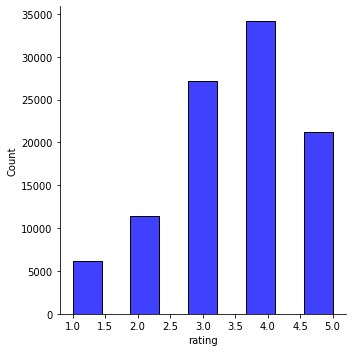

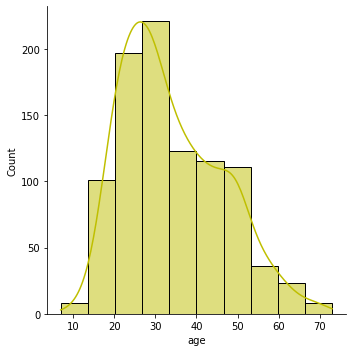

In [10]:
# 1. rating
sns.displot(df1["rating"],kde=False,bins=9,color='b')
# 2. age
sns.displot(df3["age"],kde=True,bins=10,color='y')

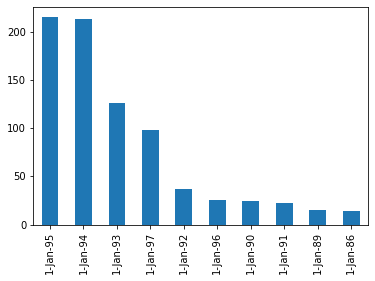

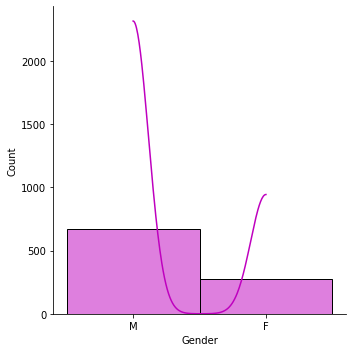

In [11]:
#3. release date
df2['release date'].value_counts().head(10).plot.bar()
#4. Gender
sns.displot(df3["Gender"],kde=True,bins=90,color="m")

<Axes: >

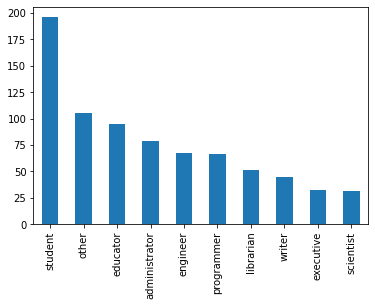

In [12]:
#5. occupation
df3['occupation'].value_counts().head(10).plot.bar()

Display the top 25 movies by average rating, as a list/series/dataframe.
Note:- Consider only the movies which received atleast a 100 ratings

In [13]:
#merge df1 and df2 to get movie id and rating
merge_df=pd.merge(df1,df2,on='movie_id')

In [14]:
#filter it for 100 recieved ratings
filtered_df=merge_df.groupby('movie title').filter(lambda x: len(x) >= 100)

In [15]:
#find average ratings
avg_ratings = filtered_df.groupby('movie title')['rating'].mean()

In [16]:
#sort it to find top 25 ratings by using decending method
sorted_ratings= avg_ratings.sort_values(ascending=False)

In [17]:
print(sorted_ratings.head(25))

movie title
Close Shave, A (1995)                                                          4.491071
Schindler's List (1993)                                                        4.466443
Wrong Trousers, The (1993)                                                     4.466102
Casablanca (1942)                                                              4.456790
Shawshank Redemption, The (1994)                                               4.445230
Rear Window (1954)                                                             4.387560
Usual Suspects, The (1995)                                                     4.385768
Star Wars (1977)                                                               4.358491
12 Angry Men (1957)                                                            4.344000
Citizen Kane (1941)                                                            4.292929
To Kill a Mockingbird (1962)                                                   4.292237
One Flew Over the Cu

Visualize how popularity of Genres has changed over the years. From the graph one should be able to see for any given year, movies of which genre got released the most.

In [18]:
#check the original dataframe
df2.head()

,movie_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
# create a new column name 'date' and arrange it in a format of yyyy-mm-dd
df2['date'] = df2['release date'].astype('datetime64[ns]')
pd.to_datetime(df2['date'], format='%Y-%m-%d')
#pd.DatetimeIndex(df['date']).year

0      1995-01-01
1      1995-01-01
2      1995-01-01
3      1995-01-01
4      1995-01-01
          ...    
1677   1998-02-06
1678   1998-02-06
1679   1998-01-01
1680   1994-01-01
1681   1996-03-08
Name: date, Length: 1682, dtype: datetime64[ns]

In [20]:
#fetch year only
df2['year']= df2.date.astype(str).str[0:4]

In [21]:
df2.head()

,movie_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,date,year
0,1,Toy Story (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1995-01-01,1995
1,2,GoldenEye (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1995-01-01,1995
2,3,Four Rooms (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995-01-01,1995
3,4,Get Shorty (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1995-01-01,1995
4,5,Copycat (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995-01-01,1995


In [22]:
genre_by_year = df2.groupby('year').sum()
genre_by_year.head()

,movie_id,video release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,,,
1973,3183,0.0,0,0,0,0,0,2,1,0,...,0,0,0,0,0,0,1,0,0,0
1974,4835,0.0,0,1,1,0,1,4,1,0,...,0,1,2,0,1,0,0,1,0,0
1975,3856,0.0,0,1,2,0,2,1,1,0,...,1,0,1,0,0,0,0,0,0,1
1976,3907,0.0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
1977,2322,0.0,0,1,2,1,1,1,0,0,...,0,0,1,1,0,2,1,0,1,0


In [23]:
# Remove movie_id column and Transform row to column
genre_by_year = genre_by_year.drop(columns = ['movie_id']).T
genre_by_year

year,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,...,2064,2065,2066,2067,2068,2069,2070,2071,2072,NaT
video release date,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
Action,0.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,6.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
Adventure,0.0,1.0,2.0,0.0,2.0,0.0,1.0,1.0,4.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0
Animation,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
Children's,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0
Comedy,2.0,4.0,1.0,0.0,1.0,2.0,3.0,3.0,2.0,3.0,...,1.0,3.0,0.0,1.0,0.0,2.0,1.0,3.0,1.0,0.0
Crime,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
Documentary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Drama,2.0,2.0,1.0,2.0,0.0,1.0,3.0,3.0,2.0,6.0,...,0.0,1.0,1.0,5.0,2.0,0.0,1.0,1.0,2.0,0.0


<Axes: xlabel='year'>

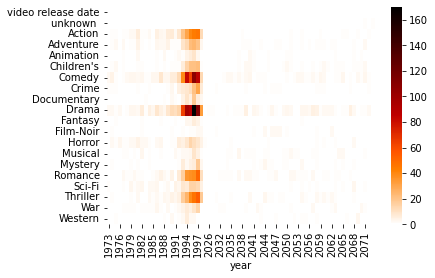

In [24]:
sns.heatmap(genre_by_year,cmap='gist_heat_r')

Verify the following statements (no need of doing a statistical test. Compare
absolute numbers):

In [25]:
merge_dfs=pd.merge(df3,merge_df,on='user_id')

In [26]:
merge_dfs['Gender']

0        M
1        M
2        M
3        M
4        M
        ..
99995    M
99996    M
99997    M
99998    M
99999    M
Name: Gender, Length: 100000, dtype: object

<Axes: xlabel='Gender', ylabel='count'>

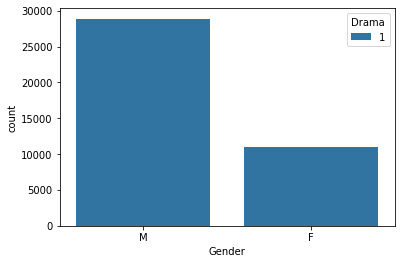

In [27]:
#Men watch more drama than women
df_filtered1=merge_dfs[merge_dfs['Drama']==1]
sns.countplot(x='Gender',hue='Drama',data=df_filtered1)

<Axes: xlabel='Gender', ylabel='count'>

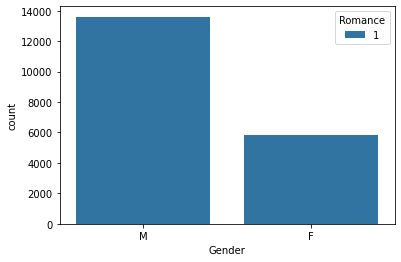

In [28]:
#Men watch more Romance than women
df_filtered2=merge_dfs[merge_dfs['Romance']==1]
sns.countplot(x='Gender',hue='Romance',data=df_filtered2) 

<Axes: xlabel='Gender', ylabel='count'>

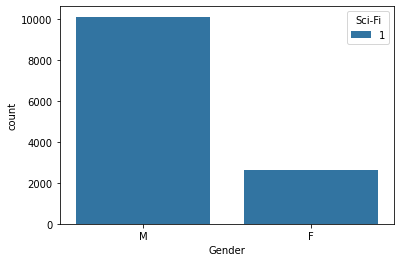

In [29]:
#Women watch more Sci-Fi than men
df_filtered3=merge_dfs[merge_dfs['Sci-Fi']==1]
sns.countplot(x='Gender',hue='Sci-Fi',data=df_filtered3)